In [4]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

filepath = r"C:\Users\vansh\AI and ML reading material\MakeMore-Implementing NLP models\names.txt"

In [5]:
#read in the dataset
words = open(filepath, 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [6]:
print("The total number of words in the dataset are: ",len(words))

The total number of words in the dataset are:  32033


In [14]:
#build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {c:i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i:c for c, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [40]:
#build the dataset

block_size = 3 #context length: how many characters do we take to predic the next one
X, Y = [], []
for w in words: #initially to set up everything we will use only the first 5 names
    #print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '------>', itos[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)


In [41]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [42]:
#build the embedding lookup table 
C = torch.randn((27, 2)) # a two dimensional embedding space is enough for us

emb = C[X] #indexes for all the characters in X
emb.shape

torch.Size([228146, 3, 2])

In [43]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [44]:
#emb.view(-1, 6) function call changes the dimensions form (32, 3,2) to (32 ,6) 
# by concatenating the 2nd and 3rd dimensions as in-place operation
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [45]:
h.shape

torch.Size([228146, 100])

In [46]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)


In [47]:
logits = h @ W2 + b2

In [48]:
logits.shape

torch.Size([228146, 27])

In [49]:
counts = logits.exp()

In [50]:
prob = counts/counts.sum(1, keepdims=True)

#### ---------Summariased neural network-------

In [51]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [130]:
g = torch.Generator().manual_seed(223452345)
C = torch.randn((27,2), generator=g, requires_grad=True)
W1 = torch.randn((6,300), generator=g, requires_grad=True)
b1 = torch.randn(300, generator=g, requires_grad=True)
W2 = torch.randn((300, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]

In [131]:
sum(p.nelement() for p in parameters) #number of paramteres in total

10281

In [132]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [153]:
lri = []
lossi = []

for i in range(1000):

    #create mini batches
    ix = torch.randint(0, X.shape[0], (32,)) 

    #forward pass
    emb = C[X[ix]] #(32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts/counts.sum(1, keepdim=True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix]) # same as the above but much more efficient
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.requires_grad = True
        p.grad = None
    loss.backward()
    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -0.001*p.grad

    lri.append(lr)
    lossi.append(loss.item())

print(loss.item())


1.9210970401763916


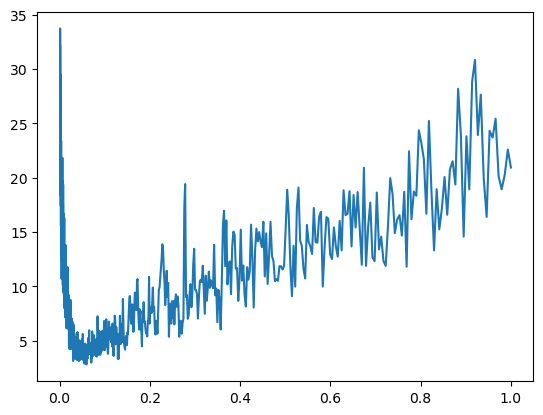

In [134]:
plt.plot(lri, lossi)

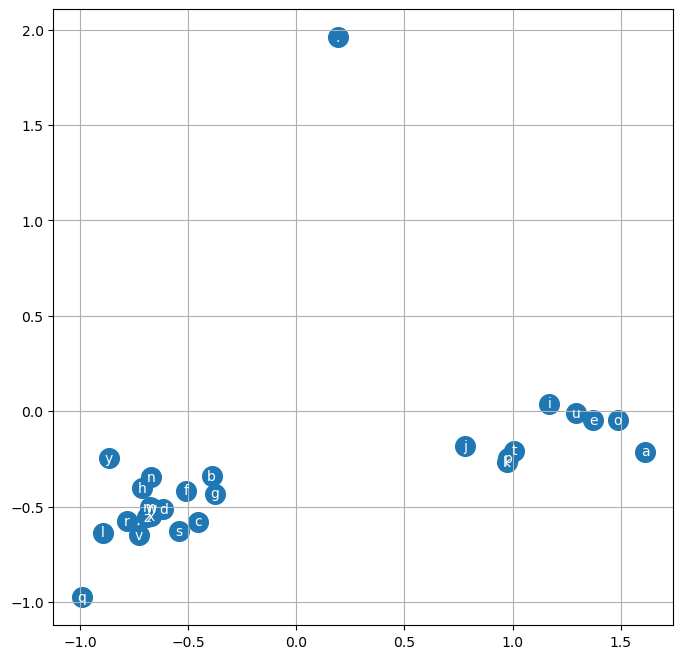

In [156]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [162]:
g = torch.Generator().manual_seed(13)

for _ in range(20):

    out = []
    context = [0]*block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

laigh.
liko.
azon.
pelynn.
koer.
ily.
cob.
kamt.
roriya.
dyjeleralirio.
iriar.
dhahleene.
kagie.
ara.
fanyahmtessiehcin.
doril.
jab.
siayittsr.
wryn.
chrid.
